Also find at google colab, where the project was first created: https://colab.research.google.com/drive/1HRdnTx52e_xvFC4oKiEqQMqKpUxGR6Oz?usp=sharing

# Imports

In [ ]:
# data handling
import numpy as np                                    # linear algebra
import pandas as pd                                   # data processing
#from google.colab import files                        # module for uploading data

# data visualization
import matplotlib.pyplot as plt                       # basic plotting library
import seaborn as sns                                 # more advanced visual plotting library 
%matplotlib inline

# ML learning
import tensorflow  as tf                              # NN framework
from tensorflow.keras import datasets, layers, models # Needed modules
from imblearn.over_sampling import SMOTE   # Function for oversampling
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# Loading Data

In [ ]:
#upload = files.upload()

In [ ]:
test_data = pd.read_csv("sample_data/exoTest.csv")
train_data = pd.read_csv("sample_data/exoTrain.csv")

In [ ]:
train_data.head()


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
test_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [ ]:
#extract the labels from the data
labels = train_data["LABEL"].values

#extract the corresponding feature vectors
train_data.drop(["LABEL"],axis=1,inplace=True)
features = train_data.values

y_test = test_data["LABEL"].values
test_data.drop(["LABEL"],axis=1,inplace=True)

# Data Visualization and Transformation

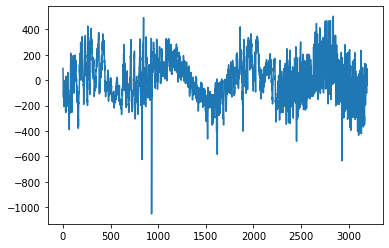

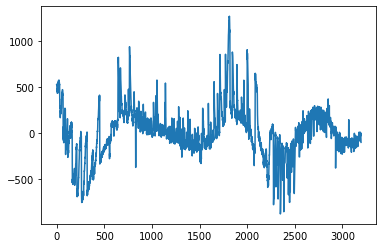

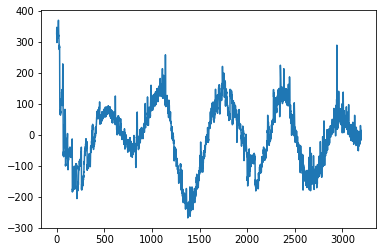

In [ ]:
plt.plot(features[0])
plt.figure()
plt.plot(features[2])
plt.show()
plt.plot(features[3])

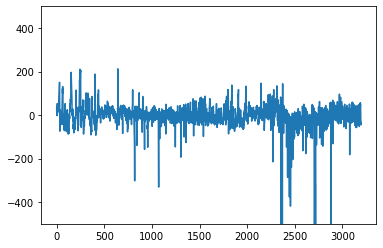

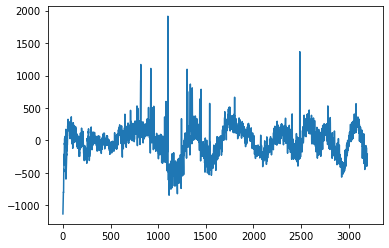

1


In [ ]:
plt.plot(features[100])
plt.ylim((-500, 500))
plt.show()

plt.plot(features[200])
plt.show()

In [ ]:
#Resampling
print("Before OverSampling, counts of label '2': {}".format(sum(labels==2)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(labels==1)))
sm = SMOTE()

x_train_res, y_train_res = sm.fit_resample(features, labels.ravel())
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))


Before OverSampling, counts of label '2': 37
Before OverSampling, counts of label '1': 5050 

After OverSampling, counts of label '2': 5050
After OverSampling, counts of label '1': 5050


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


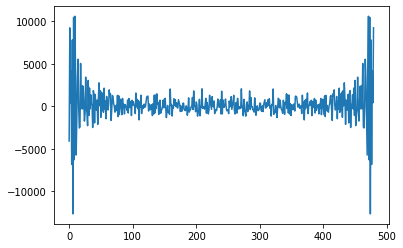

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


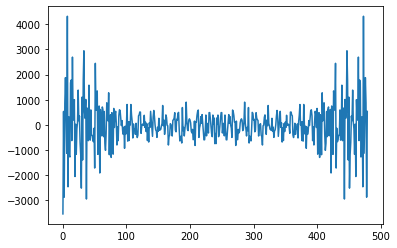

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


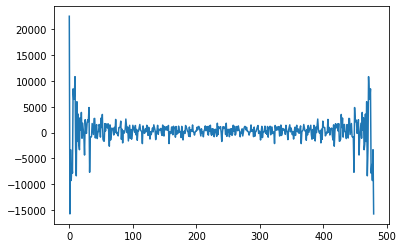

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


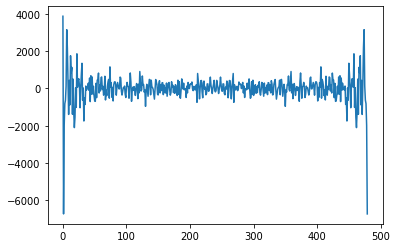

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


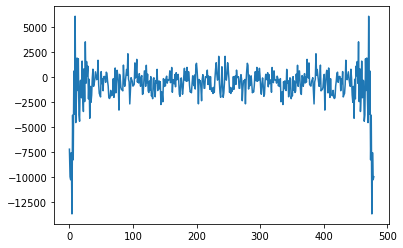

4

In [ ]:
all_rows = np.fft.fft(x_train_res,axis = 1, n = 500)

all_rows_test = np.fft.fft(test_data,axis = 1, n = 500)

plt.plot(all_rows[0, 10:-10])
plt.show()

plt.plot(all_rows[1, 10:-10])
plt.show()

plt.plot(all_rows[2, 10:-10])
plt.show()


plt.plot(all_rows[100,  10:-10])
plt.show()

plt.plot(all_rows[200,  10:-10])
plt.show()

np.argmin(all_rows[200, 10:-20])

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(all_rows, y_train_res, test_size=0.2)

In [ ]:
# Change labels so that 1 signifies detection of exoplanet and 0 signifies no detection
Y_train2 = Y_train - 1
Y_val2 = Y_val - 1

y_test2 = y_test - 1

# Model and Callback functions

In [ ]:
def define_model(N=10, L=40):
    CNN = models.Sequential()
    CNN.add(layers.Conv1D(20, 40, activation='relu', name="conv1", input_shape=(500, 1)))
    CNN.add(layers.MaxPooling1D(pool_size = (100,)))
    CNN.add(layers.Flatten())
    CNN.add(layers.Dense(20))
    CNN.add(layers.Activation('relu'))
    CNN.add(layers.Dropout(0.2))
    CNN.add(layers.Dense(1))
    CNN.add(layers.Activation('sigmoid'))

    return CNN

model = define_model()

class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('val_loss'))
        print('-----------------------------------------------------------------------')
        print('Epoch ' + str(epoch) + ' - Validation loss: ' + str(logs.get('val_loss')) + ' accuracy : ' + str(logs.get('val_accuracy')))
        print('-----------------------------------------------------------------------')

In [ ]:
loss_history = LossHistory()

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# Training

In [ ]:
history=model.fit(X_train, Y_train2, validation_data=(X_val, Y_val2), epochs=100, callbacks = [loss_history], batch_size = 50)


Epoch 1/100
160/162 [============================>.] - ETA: 0s - loss: 899.0522 - accuracy: 0.5960-----------------------------------------------------------------------
Epoch 0 - Validation loss: 281.2359313964844 accuracy : 0.5475247502326965
-----------------------------------------------------------------------
162/162 [==============================] - 5s 25ms/step - loss: 891.8269 - accuracy: 0.5952 - val_loss: 281.2359 - val_accuracy: 0.5475
Epoch 2/100
160/162 [============================>.] - ETA: 0s - loss: 212.0577 - accuracy: 0.6120-----------------------------------------------------------------------
Epoch 1 - Validation loss: 93.25467681884766 accuracy : 0.6871287226676941
-----------------------------------------------------------------------
162/162 [==============================] - 4s 24ms/step - loss: 220.2387 - accuracy: 0.6121 - val_loss: 93.2547 - val_accuracy: 0.6871
Epoch 3/100
161/162 [============================>.] - ETA: 0s - loss: 685.6339 - accuracy: 0.6

In [ ]:
history=model.fit(X_train, Y_train2, validation_data=(X_val, Y_val2), epochs=50, callbacks = [loss_history], batch_size = 50)


Epoch 1/50
161/162 [============================>.] - ETA: 0s - loss: 0.2382 - accuracy: 0.9294-----------------------------------------------------------------------
Epoch 0 - Validation loss: 0.09990175813436508 accuracy : 0.9821782112121582
-----------------------------------------------------------------------
162/162 [==============================] - 4s 27ms/step - loss: 0.2379 - accuracy: 0.9296 - val_loss: 0.0999 - val_accuracy: 0.9822
Epoch 2/50
160/162 [============================>.] - ETA: 0s - loss: 0.2514 - accuracy: 0.9124-----------------------------------------------------------------------
Epoch 1 - Validation loss: 0.11625880002975464 accuracy : 0.9752475023269653
-----------------------------------------------------------------------
162/162 [==============================] - 4s 24ms/step - loss: 0.2521 - accuracy: 0.9120 - val_loss: 0.1163 - val_accuracy: 0.9752
Epoch 3/50
162/162 [==============================] - ETA: 0s - loss: 0.2560 - accuracy: 0.9101---------

# Results and Validation

18/18 [==============================] - 0s 6ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

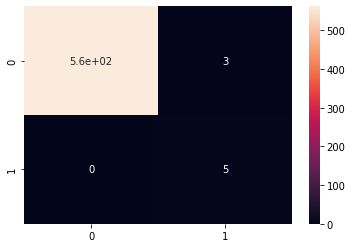

In [ ]:
Y_pred = np.rint(model.predict(all_rows_test))
cm = confusion_matrix(y_test2, Y_pred)

sns.heatmap(cm, annot=True)
plt.savefig('Exoplanets_conf_matrix.png', dpi = 1200)
#files.download("Exoplanets_conf_matrix.png") 

64/64 [==============================] - 0s 4ms/step


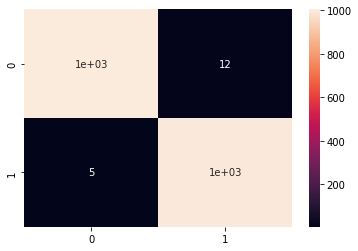

In [ ]:
Y_pred = np.rint(model.predict(X_val))
cm = confusion_matrix(Y_val2, Y_pred)

sns.heatmap(cm, annot=True)

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv1D)              (None, 461, 20)           820       
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 4, 20)            0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 80)                0         
                                                                 
 dense_15 (Dense)            (None, 20)                1620      
                                                                 
 activation_15 (Activation)  (None, 20)                0         
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                      